In [1]:
#Import all necessary packages.
%matplotlib inline
import sys, platform, os

from matplotlib import pyplot as plt
import numpy as np

import camb
from camb import model, initialpower

import pylab as pl

import scipy
from scipy.interpolate import interp1d
#from __future__ import division

from scipy import integrate
from scipy import linalg

In [2]:
# para obtener ayuda, usar: camb.CAMBparams?

In [3]:
#Fiducial cosmological parameters
c=3e5
pi=np.pi
## omegac =~ 0.25
## omegab =~ 0.05
h=0.678
omegab=0.05  ## pasar a camb: omegab*h^2
omegac=0.24   ## pasar a camb: omegac*h^2
omegam=omegac+omegab

In [84]:
class CAMBresults:
    def __init__(self, redshifts=[0.], **kwargs):
        H0 = kwargs['H0']
        ombh2 = kwargs['ombh2']
        omch2 = kwargs['omch2']
        mnu = kwargs['mnu']
        w = kwargs['w']
        wa = kwargs['wa']
        As = kwargs['As']
        ns = kwargs['ns']
        kmax = kwargs['kmax']
        halofit_formula = kwargs.get('halofit_formula', 'takahashi')
        #print(halofit_formula)
        self.pars = camb.CAMBparams()
        self.kmax = kmax
        self.pars.set_cosmology( H0 = H0, ombh2 = ombh2, omch2 = omch2, mnu = mnu)
        self.pars.set_dark_energy(w = w, wa = wa)
        #print(self.pars)
        self.pars.InitPower.set_params(As = As, ns = ns)
        self.results = camb.get_results(self.pars)
        self.pars.set_matter_power(redshifts = redshifts, kmax = kmax)
        self.pars.NonLinear = model.NonLinear_none
        self.pars.NonLinearModel.set_params(halofit_version = halofit_formula)
        self.results.calc_power_spectra(self.pars)        

    def interpolate_power_spec(self):
        values = self.results.get_matter_power_spectrum(minkh = 1e-4, maxkh = self.kmax, npoints = 500)
        self.kh, self.z, self.pk = values
        #self.PK = camb.get_matter_power_interpolator(self.pars, hubble_units = True, k_hunit = True, log_interp = False)
        return None
    def power_spec(self, z, k):
        pkz = self.PK(z,k)[0,0]
        return pkz

In [85]:
#camb.get_matter_power_interpolator?

In [86]:
"""Aquí es donde me está dando error, al inicializar. Más abajo va a ver que 
    no inicialicé la clase de HIPowerspectrum porque depende de estos parámetros,
    aparte de que me parece que la forma en que estoy llamando al PK de CAMB está mal,
    pero por este error no lo he podido probar"""
h = 0.672
prueba1 = CAMBresults(redshifts=[0., 1., 2.] , H0=h*100, 
                      ombh2=omegab*(h**2), omch2 = omegac*(h**2), 
                      mnu = 0.0, w =-1, wa =0, As = 2.14e-9, ns = 0.968, kmax=5)


#print('prueba4:', prueba1.power_spec_z0)

Note: redshifts have been re-sorted (earliest first)


In [87]:
prueba1.interpolate_power_spec()

In [99]:
prueba1.kh;

In [102]:
prueba1.z

[0.0, 1.0, 2.0]

In [100]:
prueba1.pk

array([[4.78294343e+02, 4.88433220e+02, 4.98786743e+02, ...,
        1.25946801e+00, 1.19166177e+00, 1.12745270e+00],
       [1.80896236e+02, 1.84731100e+02, 1.88647166e+02, ...,
        4.76965404e-01, 4.51286905e-01, 4.26970668e-01],
       [8.59762262e+01, 8.77989442e+01, 8.96602614e+01, ...,
        2.27049453e-01, 2.14825732e-01, 2.03250487e-01]])

In [103]:
Pkz = [interp1d(prueba1.kh, pkz) for pkz in prueba1.pk]

In [104]:
Pkz

In [111]:
Pkz[0](karray) 

array([4.34415685e+03, 4.68491002e+03, 5.05027210e+03, 5.44166829e+03,
       5.86047368e+03, 6.30802522e+03, 6.78551279e+03, 7.29426249e+03,
       7.83540368e+03, 8.40990321e+03, 9.01831736e+03, 9.66141202e+03,
       1.03394843e+04, 1.10525050e+04, 1.17995569e+04, 1.25801177e+04,
       1.33927560e+04, 1.42354259e+04, 1.51045880e+04, 1.59972135e+04,
       1.69089392e+04, 1.78344043e+04, 1.87660354e+04, 1.96969312e+04,
       2.06184092e+04, 2.15203398e+04, 2.23896255e+04, 2.32140756e+04,
       2.39796264e+04, 2.46704285e+04, 2.52672386e+04, 2.57526059e+04,
       2.61080438e+04, 2.63140920e+04, 2.63497175e+04, 2.61984548e+04,
       2.58471569e+04, 2.52862972e+04, 2.45118057e+04, 2.35313540e+04,
       2.23640540e+04, 2.10404141e+04, 1.96045020e+04, 1.81137112e+04,
       1.66308756e+04, 1.52226982e+04, 1.39488341e+04, 1.28479686e+04,
       1.19562924e+04, 1.12456871e+04, 1.06488165e+04, 1.00728059e+04,
       9.41266300e+03, 8.57960067e+03, 7.56151413e+03, 6.46788789e+03,
      

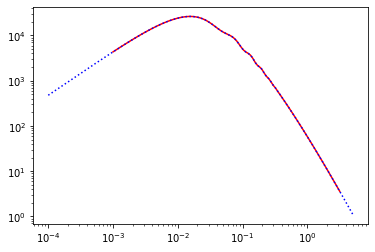

In [113]:
plt.loglog(karray, Pkz[0](karray) , '-', color='red')
plt.loglog(prueba1.kh, prueba1.pk[0] , ':', color='blue')

In [25]:
prueba2 = CAMBresults(redshifts=[0.] , H0=h*100, 
                      ombh2=omegab*(h**2), omch2 = omegac*(h**2), 
                      mnu = 0.0, w =-1, wa =0, As = 2.2e-9, ns = 0.968, kmax=1)

In [26]:
prueba2.results.get_sigma8()

array([0.78810357])

In [ ]:
"""Todo esto lo estoy probando con valores super random, entonces los resultados que tiran son
    cualquier cosa... Tal vez usted pueda ponerle valores un poco más reales para ver si todo
    está funcionando bien.
    
    Para tomar en cuenta: me estoy basando en dos cosas. 1- el código para empezar todo, que usted
    me había pasado hace un tiempo, y 2- el código y diapositivas de Alkistis, en donde vienen
    todas las ecuaciones.
    
    Yo había subido un archivo que se llama Fisher Matrix Test, en donde había puesto las
    ecuaciones de forma visible para entenderlo. De ese archivo me estoy basando para poner
    todo lo que hay aquí.
    
    Si hay algo que está mal o que se debe cambiar, me avisa para corregirlo.
    
    Yo estoy subiendo este archivo .ipynb pero todo lo estoy trabajando en un archivo .py
    porque me parece más cómodo para trabajar."""

"""Aquí hago la clase madre de muchas otras, donde defino la energía E(z)"""

class Hubble:
    """Obtain Hubble function
        Parameter:
            H0: Hubble constant"""
    def __init__(self, H0, h_z):
        self.H0 = H0
        self._h_z = h_z

    def E_z(self, z):
        """E(z)
            Parameters:
                z: Redshift
                Notes: H(z) in km/s/Mpc while CAMB's H(z) is in 1/Mpc"""
        h_z_phys = self._h_z*constants.c
        return h_z_phys / self.H0

prueba2 = Hubble(0.67, 10)
print('E(z):', prueba2.E_z(2.0))

In [ ]:
"""Defino el factor de crecimiento"""

class growthFactor(Hubble):
    """Growth Factor
        Parameters:
            Omega_0:  
            z: redshift
            Gamma: """
    def __init__(self, H0, h_z, omega0, gamma):
        super().__init__(H0, h_z)
        self.omega0 = omega0
        self.gamma = gamma

    def growthFunction(self, z):
        value1 = self.E_z(z)
        value2 = self.omega0*pow((1 + z), 3)
        value3 = pow(value2/value1, self.gamma)
        return value3

    def dgF_dz(self, z):
        return (self.growthFunction(z))/(1 + z)

    def Growth_Factor(self, z):
        return np.exp(integrate.romberg(self.dgF_dz, 0., z))

prueba3 = growthFactor(0.67, 10, 10, 2)
print("Growth Factor:", prueba3.Growth_Factor(4))

In [ ]:
"""Obtengo la temperatura que se utiliza en la ecuación del PHI"""

class Temperature(Hubble): #obtaining the temperature (T^2(z)) for the Power Spectrum (PHI(z))
    def __init__(self, H0, h_z, densityHI):
        super().__init__(H0, h_z)
        self.densityHI = densityHI
    
    def omega_HI(self, z):
        return (8*np.pi*constants.G*self.densityHI)/(3*(self.H0**2))
    
    def Temp_obs(self, z):
        return 44e-6*(self.omega_HI(z)*((self.H0/100)/2.45e-4)*((1 + z)**2))/self.E_z(z)

prueba4 = Temperature(0.67, 10, 0.5)
print('Temperature:', prueba4.Temp_obs(2))

In [ ]:
"""Con las clases anteriores, ya se puede obtener el Power Spectrum
    No lo inicialicé por el problema que está dando en la clase de CAMB
    Fíjese en la definición de matterPowerSpectrum como estoy llamando el PK de camb
    No estoy seguro de que sea la forma correcta. Tal vez me pueda aclarar eso un poco.
    Estoy viendo cómo utilizar una lista de datos como argumento en las definiciones,
    para no tener que poner tantos argumentos."""

class HIPowerSpectrum:
    def __init__(self, H0, ombh2, omch2, mnu, w0, wa, As, ns, kmax, redshifts, h_z, densityHI, omega0, gamma, bias):
        self.camb = CAMBresults(H0, ombh2, omch2, mnu, w0, wa, As, ns, kmax, redshifts)
        self.temperature = Temperature(H0, h_z, densityHI)
        self.growth_factor = growthFactor(H0, h_z, omega0, gamma)
        self.bias = bias
        
    def matterPowerSpectrum(self, z):
        return (self.growth_factor.Growth_Factor(z)**2)*self.camb.PK
    
    def HIPowerSpectrum(self, z):
        return (self.temperature.Temp_obs(z)**2)*(self.bias**2)*(self.matterPowerSpectrum(z)**2)

#prueba5

In [ ]:
"""A partir de aquí empiezo a obtener los valores necesarios para la Matriz de Fisher"""

class sigmaPix:
    def __init__(self, Ddish, delta_f, ttotal, omegaTot, Ndishes, Nbeams, Tsys):
        #alist = []
        self.Ddish = Ddish
        self.delta_f = delta_f
        self.ttotal = ttotal
        self.omegaTot = omegaTot
        self.Ndishes = Ndishes
        self.Nbeams = Nbeams
        self.Tsys = Tsys
    
    def theta_B(self, z):
        return 21*(1 + z)/self.Ddish
    
    def Omega_Pix(self, z):
        return 1.31*(self.theta_B(z))**2
        
    def sigma_Pix(self, z):
        return self.Tsys/np.sqrt(self.delta_f*self.ttotal*(self.Omega_Pix(z)/self.omegaTot)*self.Ndishes*self.Nbeams)

prueba6 = sigmaPix(13, 1, 2, 3, 4, 1, 21.1e3)
print("sigma_Pix:", prueba6.sigma_Pix(2))

In [ ]:
class ComovingDistance(Hubble):
    """Comvoing Distance
        Parameters:
            H0: Hubble constant"""
    def __init__(self, H0, h_z):
        super().__init__(H0, h_z)
        self.r_z_vec = np.vectorize(self.rcom)

    def rcom_prime(self, z): #this is the one used for results
        return self.r_z_vec(z)/(constants.c/self.H0)

    def drdz(self, z):
        return (constants.c/self.H0)/self.E_z(z)

    def rcom(self, z):
        return integrate.romberg(self.drdz, 0., z)

prueba7 = ComovingDistance(0.67, 10)
print('Comoving Distance:', prueba7.rcom_prime(4))

In [ ]:
"""Me estoy guiando en el código de Alkistis para obtener el zmin y zmax.
    Es raro porque esos valores de Dzbin, dfpix y midfreq son valores que en ningún otro lado
    aparecen más que en el código."""


class V_pix(ComovingDistance):
    def __init__(self, H0, h_z, Ddish, delta_f, ttotal, omegaTot, Ndishes, Nbeams, Tsys, Dzbin, dfpix, midfreq):
        super().__init__(H0, h_z)
        self._sigmaPix = sigmaPix(Ddish, delta_f, ttotal, omegaTot, Ndishes, Nbeams, Tsys)
        self.Dzbin = Dzbin
        self.dfpix = dfpix
        self.midfreq = midfreq
        
    def dV_pixdz(self, z):
        return constants.c*(self.rcom_prime(z)**2)/(100*self.H0*self.E_z(z))
    
    def dzpix(self, z): #it is used to obtain the zmin and zmax for integration.
        return ((1 + z)**2)*self.dfpix/self.midfreq
    
    def zmax(self, z):
        return z + self.dzpix(z)/2
    
    def zmin(self, z):
        return z - self.dzpix(z)/2
    
    def Vpix(self, z):
        return self._sigmaPix.sigma_Pix(z)*(integrate.romberg(self.dV_pixdz, self.zmin(z), self.zmax(z)))

prueba8 = V_pix(0.67, 10, 13, 1, 2, 3, 4, 1, 21.1e3, 0.1, 50e3, 14204e6)
print("V_pix:", prueba8.Vpix(2))

In [ ]:
class Wsquared(ComovingDistance, sigmaPix):
    def __init__(self, H0, h_z, Ddish, delta_f, ttotal, omegaTot, Ndishes, Nbeams, Tsys):
        ComovingDistance.__init__(self, H0, h_z)
        sigmaPix.__init__(self, Ddish, delta_f, ttotal, omegaTot, Ndishes, Nbeams, Tsys)
    
    def Wsq(self, k, z):
        return np.exp(-1*(k**2)*self.rcom_prime(z)**2*(self.theta_B(z)/np.sqrt(8*np.log(2))))

prueba9 = Wsquared(0.67, 0.1, 13, 0.14, 4000, 3, 4, 1, 21.1e3)
print("W^2:", prueba9.Wsq(1.07, 2))

In [ ]:
class PNoise:
    def __init__(self, H0, h_z, Ddish, delta_f, ttotal, omegaTot, Ndishes, Nbeams, Tsys, Dzbin, dfpix, midfreq):
        self._sigmaPix = sigmaPix(Ddish, delta_f, ttotal, omegaTot, Ndishes, Nbeams, Tsys)
        self._V_pix = V_pix(H0, h_z, Ddish, delta_f, ttotal, omegaTot, Ndishes, Nbeams, Tsys, Dzbin, dfpix, midfreq)
        self._Wsquared = Wsquared(H0, h_z, Ddish, delta_f, ttotal, omegaTot, Ndishes, Nbeams, Tsys)
        
    def P_Noise(self, k, z):
        return (self._sigmaPix.sigma_Pix(z)**2)*(self._V_pix.Vpix(z))*(self._Wsquared.Wsq(k, z)**-2)

prueba10 = PNoise(0.67, 0.1, 13, 0.14, 4000, 3, 4, 1, 21.1e3, 0.1, 50e3, 14204e6)
print("P_Noise", prueba10.P_Noise(0.1, 2))

In [ ]:
"""Aquí estoy poniendo como argumento el sigmaSur que es el sigma del Survey específico,
    pero en el código de Alkistis no lo toman en cuenta, me parece."""


class V_survey(ComovingDistance):
    def __init__(self, H0, h_z, sigmaSur, Dzbin):
        super().__init__(H0, h_z)
        self.sigmaSur = sigmaSur
        self.Dzbin = Dzbin
        
    def dV_surdz(self, z):
        return constants.c*(self.rcom_prime(z)**2)/(100*self.H0*self.E_z(z))
    
    def zmax(self, z):
        return z + self.Dzbin/2
    
    def zmin(self, z):
        return z - self.Dzbin/2
    
    def Vsur(self, z):
        return self.sigmaSur*(integrate.romberg(self.dV_surdz, self.zmin(z), self.zmax(z)))

prueba8 = V_survey(0.67, 10, 0.53, 0.1)
print("V_sur:", prueba8.Vsur(2))

In [ ]:
"""Esto es para la integral de la matriz de Fisher más adelante."""

class kminmax(ComovingDistance):
    def __init__(self, H0, h_z, omegaTot, ns):
        super().__init__(H0, h_z)
        self.omegaTot = omegaTot
        self.ns = ns
    
    def kmin(self, z):
        return 2*np.pi/np.sqrt((self.rcom_prime(z)**2)*self.omegaTot)
    
    def kmax(self, z):
        return 0.14*pow((1 + z),(2/(2 + self.ns)))
        
prueba12 = kminmax(0.67, 0.1, 0.53, 1)
print("k_min:", prueba12.kmin(2))
print("k_max:", prueba12.kmax(2))